# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

# HIPOTESIS:

- **HIPOTESIS NULA** ($H₀$): No existe una diferencia significativa en la pérdida de peso promedio entre las dos dietas.
- **HIPOTESIS ALTERNARIVA** ($H₁$): existe una diferencia significativa en la pérdida de peso promedio entre las dos dietas.

In [7]:
# TODO

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

diet1= np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
diet2= np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])
alpha= int(0.05)
statistic , pvalue= stats.ttest_ind(diet1, diet2)

if alpha < pvalue:
    print (f'La probabilidad p={pvalue:.4f} es menor que el valor de significancia, lo que significa que hay suficiente evidencia para rechazar la hipótesis nula y concluir que existe una diferencia significativa entre las medias.')
else:
    print (f'La probabilidad p={pvalue:.4f} es mayor o igual que el valor de significancia, lo que significa que hay suficiente evidencia para aceptar la hipótesis nula y concluir que no existe una diferencia significativa entre las medias.')







La probabilidad p=0.0041 es menor que el valor de significancia, lo que significa que hay suficiente evidencia para rechazar la hipótesis nula y concluir que existe una diferencia significativa entre las medias.


## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

# HIPOTESIS:

- **HIPOTESIS NULA** ($H₀$):  No hay diferencias entre las medias de los diferentes fertilizantes
- **HIPOTESIS ALTERNARIVA** ($H₁$):  Al menos un par de medias son significativamente distintas la una de la otra.

In [10]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot


fertilizante1 = [20, 21, 20, 19, 20]
fertilizante2 = [22, 21, 23, 22, 21]
fertilizante3 = [24, 23, 22, 23, 24]
data = {
    "Fertilizante": ["Fertilizante1"] * len(fertilizante1) +
                     ["Fertilizante2"] * len(fertilizante2) +
                     ["Fertilizante3"] * len(fertilizante3),
    "Cantidad": fertilizante1 + fertilizante2 + fertilizante3
}

datos = pd.DataFrame(data)
print(datos)

     Fertilizante  Cantidad
0   Fertilizante1        20
1   Fertilizante1        21
2   Fertilizante1        20
3   Fertilizante1        19
4   Fertilizante1        20
5   Fertilizante2        22
6   Fertilizante2        21
7   Fertilizante2        23
8   Fertilizante2        22
9   Fertilizante2        21
10  Fertilizante3        24
11  Fertilizante3        23
12  Fertilizante3        22
13  Fertilizante3        23
14  Fertilizante3        24


In [11]:
pg.anova(data=datos, dv='Cantidad', between='Fertilizante', detailed=True)


,Source,SS,DF,MS,F,p-unc,np2
0,Fertilizante,25.733333,2,12.866667,20.315789,0.00014,0.772
1,Within,7.600000,12,0.633333,NaN,NaN,NaN


Conclusión: 

 p-valor= 0.00014, este es mucho menor que el valor de significancia, lo que sugiere que se puede rechazar la hipotesis nula debido a la diferencia estadisticamente significativa entre fertilizantes.

In [14]:
#Cuál es el mejor fertilizante? 
import statsmodels.stats.multicomp as mc
# perform Tukey's test
tukey = mc.pairwise_tukeyhsd(endog=datos['Cantidad'],
                          groups=datos['Fertilizante'],
                          alpha=0.05)

print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower  upper  reject
----------------------------------------------------------------
Fertilizante1 Fertilizante2      1.8 0.0099 0.4572 3.1428   True
Fertilizante1 Fertilizante3      3.2 0.0001 1.8572 4.5428   True
Fertilizante2 Fertilizante3      1.4 0.0409 0.0572 2.7428   True
----------------------------------------------------------------


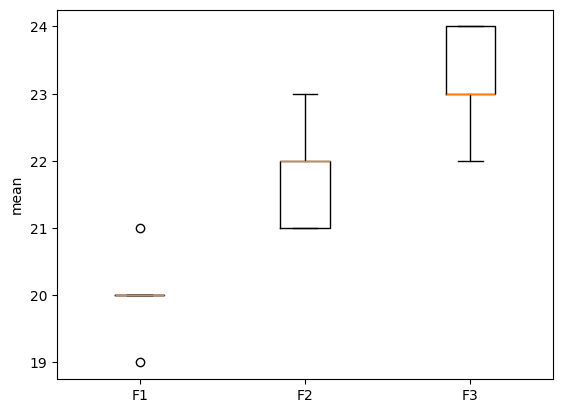

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([fertilizante1, fertilizante2, fertilizante3])
ax.set_xticklabels(["F1", "F2", "F3"]) 
ax.set_ylabel("mean") 
plt.show()

Hay diferencias significativas entre todos los fertilizantes, ya que todos son superiores a 0,05; El fertilizante 3 tiene mayor cantidad promedio producida de aprox 23kilos por parcela, comparado con los demás fertilizantes, donde supera en promedio en 3.2 al fertilizante1  y en 1.4 al fertilizante2 